In [1]:
import pandas as pd

# Load the dataset
file_path = 'EZ_associative_learning_transformed_part_2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


Experiment   v1_mean   v2_mean   v3_mean  \
0  1000_associative_priming_part_2.dat  1.784782  1.976146 -2.076854   
1  1001_associative_priming_part_2.dat  3.143215  2.825879 -3.197270   
2  1002_associative_priming_part_2.dat  2.229151  1.952599 -2.180248   
3  1003_associative_priming_part_2.dat  2.637137  2.693615 -3.160563   
4  1004_associative_priming_part_2.dat  1.300171  1.212222 -1.437136   

    v4_mean    a_mean  ndt1_mean  ndt2_mean  ndt3_mean  ndt4_mean  ...  \
0 -2.188216  1.207311   0.447177   0.527242   0.514844   0.509784  ...   
1 -2.879506  1.288625   0.476985   0.502584   0.511300   0.486418  ...   
2 -2.562964  1.420030   0.421342   0.458384   0.489302   0.484345  ...   
3 -2.858156  1.466211   0.437507   0.492158   0.497465   0.481613  ...   
4 -1.861038  0.806801   0.416736   0.442779   0.449269   0.442852  ...   

                                                q4_E    ID  Task    Session  \
0        [0.991 1.119 1.093 2.199 0.958 0.934 1.135]  1000   APT  Session 2   
1                                [0.688 2.128 1.472]  1001   APT  Session 2   
2                          [0.967 0.967 0.911 0.943]  1002   APT  Session 2   
3                                             [1.04]  1003   APT  Session 2   
4  [0.867 0.69  0.833 0.794 0.73  0.698 0.642 0.7...  1004   APT  Session 2   

   alpha_shifted  alpha_clipped alpha_arcsin alpha_mean_boxcox_after_arcsin  \
0       0.724234       0.724234     1.017923                       0.018094   
1       0.890192       0.890192     1.233038                       0.261955   
2       0.936259       0.936259     1.315564                       0.368667   
3       0.963947       0.963947     1.379760                       0.456751   
4       0.379787       0.379787     0.663995                      -0.276595   

  accuracy_arcsin accuracy_percentage_boxcox_after_arcsin  
0        1.298174                                0.554817  
1        1.404195                                0.931574  
2        1.368410                                0.790367  
3        1.458476                                1.176655  
4        1.180147                                0.262780  

[5 rows x 35 columns]

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

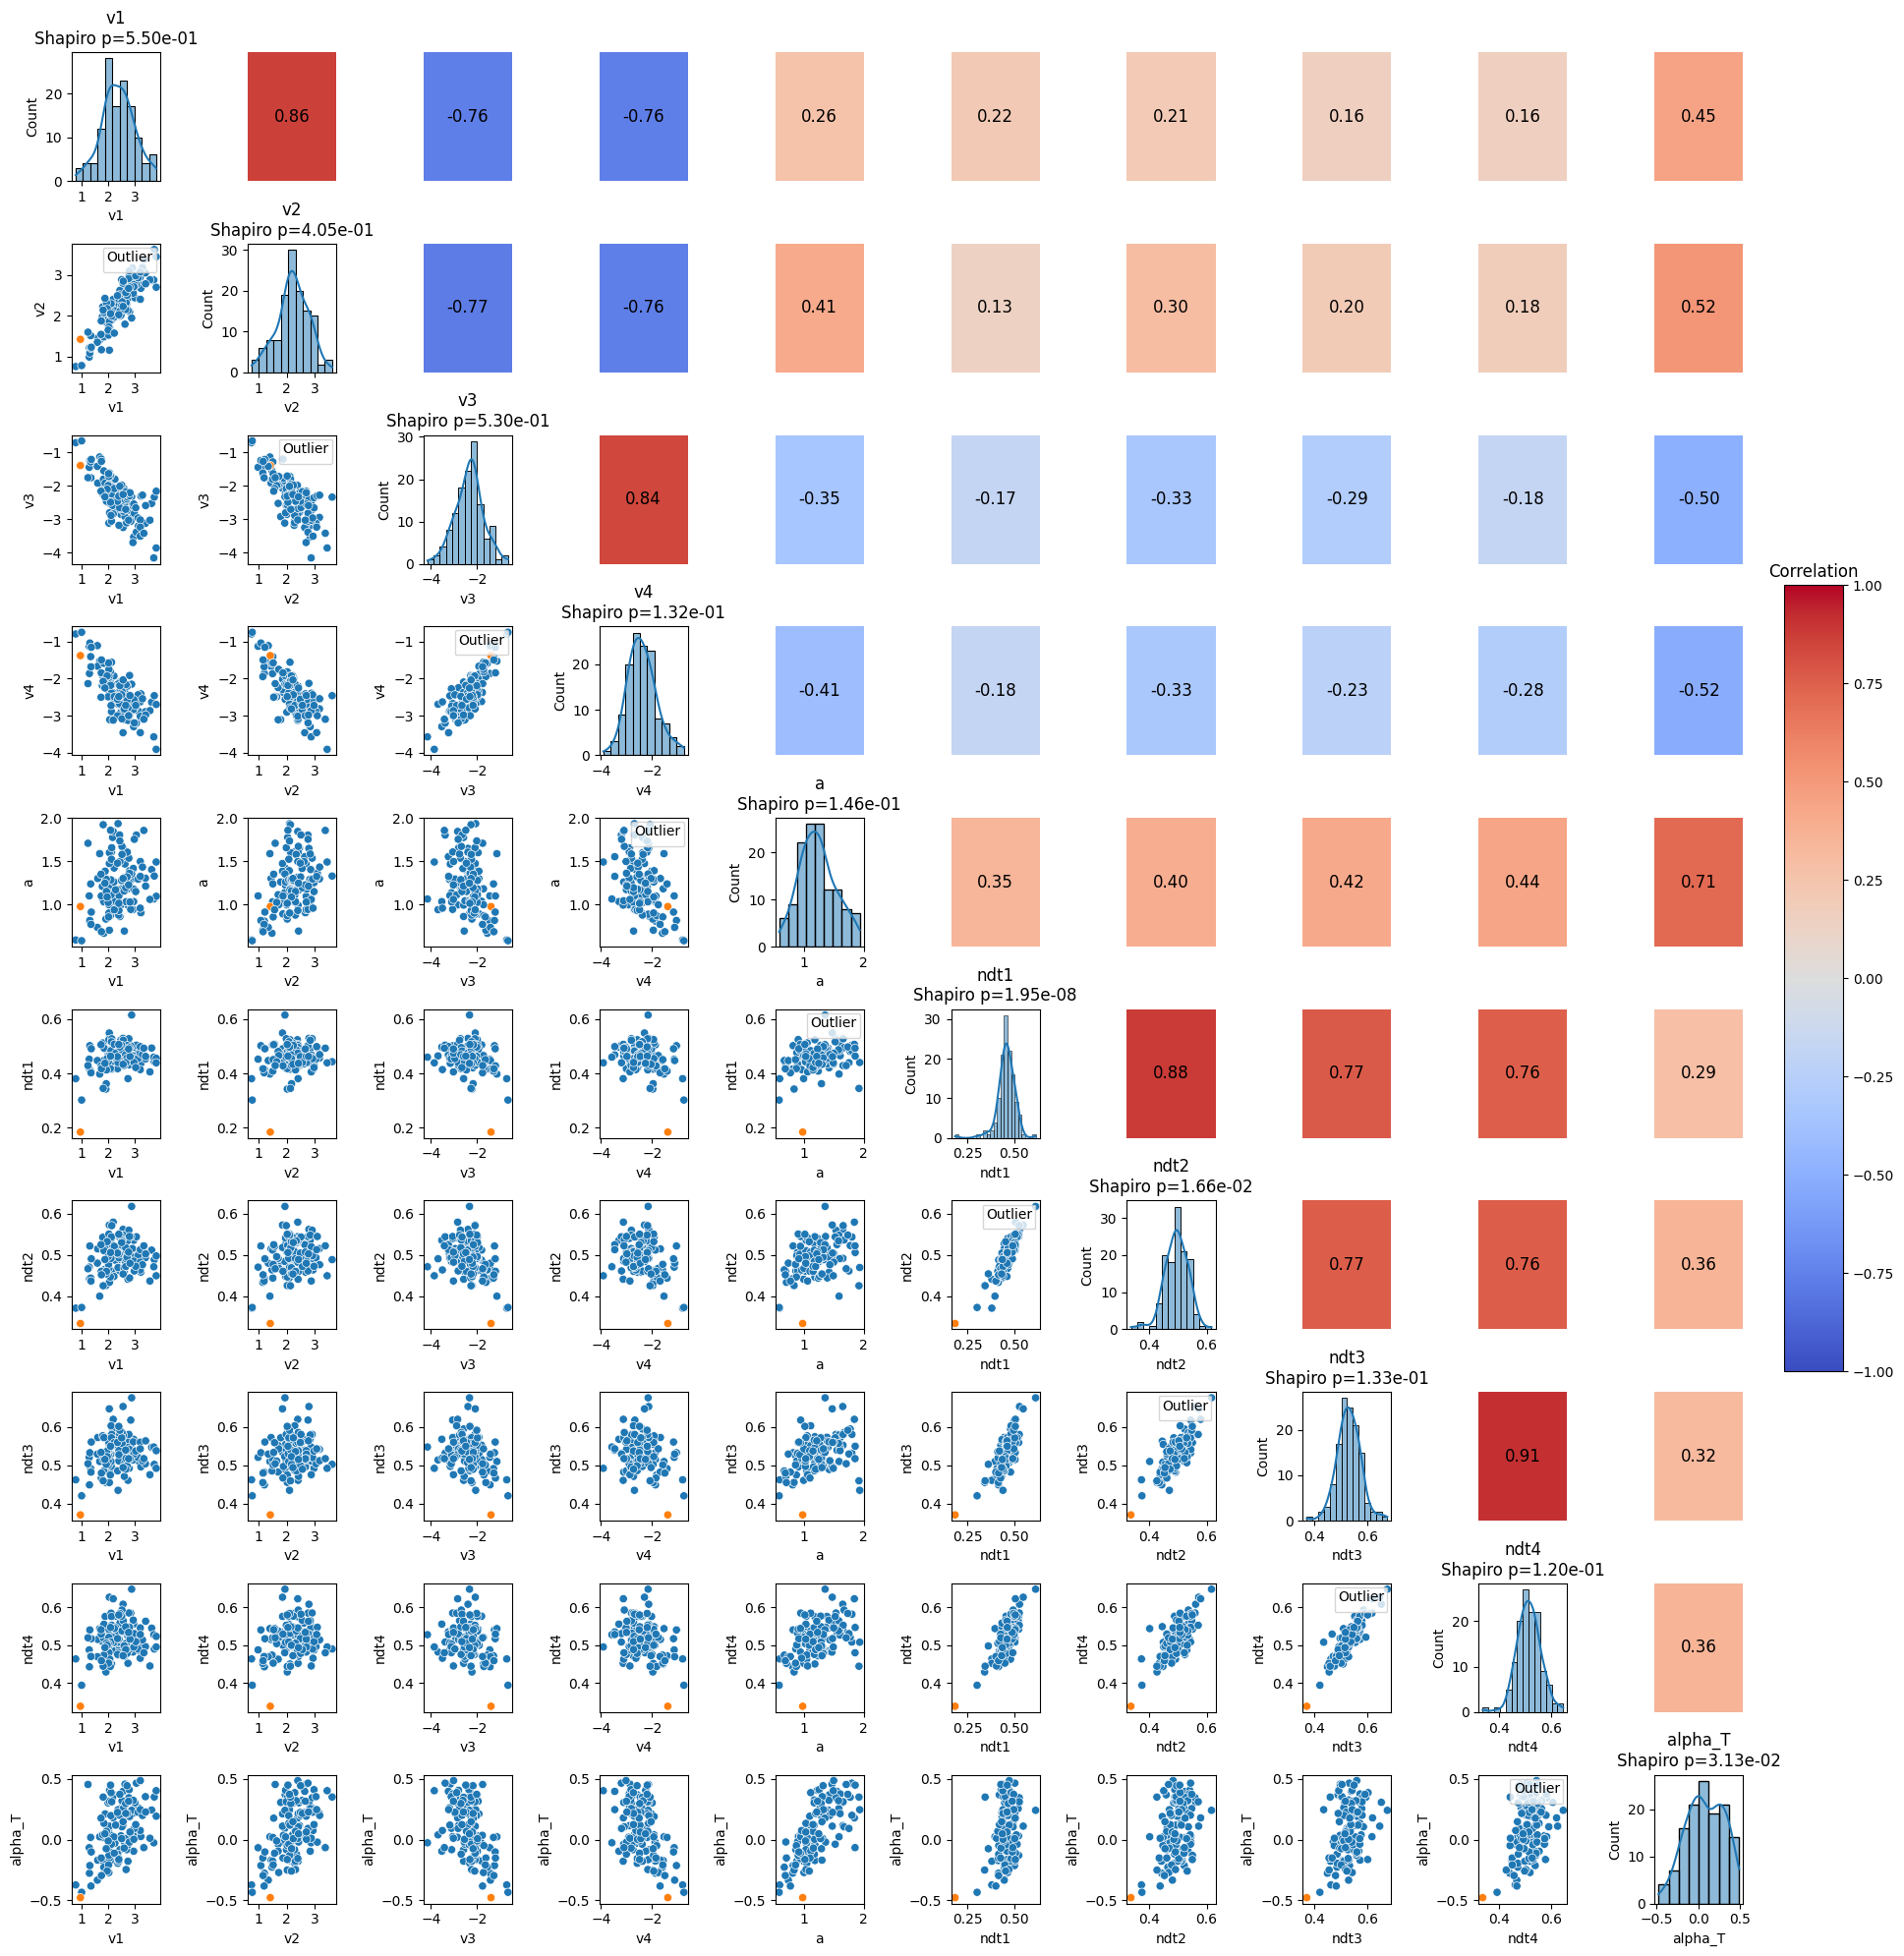

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_2.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 #'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 #'sndt_mean',
 #'alpha_mean',
  #  'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
   # 'accuracy_percentage_boxcox_after_arcsin'
                  ]

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    #'zr_mean': 'zr',
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_T', 
   # 'mean_log_rt': 'mean_log_rt', 
   # 'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
# ... [rest of your code remains unchanged] ...

# Define the colormap for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the visualization
fig, axn = plt.subplots(len(renamed_params), len(renamed_params), figsize=(20, 20))
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Adjust the position of the colorbar

for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        ax = axn[i, j]
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True, ax=ax)
            ax.set_title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False, ax=ax)
            if i == j + 1:
                ax.legend(loc='upper right', title='Outlier', prop={'size': 6})
            # ax.set_title(f'({param_j} vs {param_i})')
        else:
            corr_value = correlation_matrix_renamed.iloc[i, j]
            color = cmap((corr_value + 1) / 2)
            ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=color))
            ax.text(0.5, 0.5, f'{corr_value:.2f}', ha='center', va='center', fontsize=12)
            ax.axis('off')

# Create a colorbar
norm = plt.Normalize(vmin=-1, vmax=1)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar_ax.set_title('Correlation')

plt.tight_layout(rect=[0, 0, .9, 1])
plt.savefig('EZ_APT_S2_correlation_matrix_HeatMap_plot.png')  # Saves the plot to a file
plt.show()
plt.close()




In [3]:
import numpy as np
import scipy.stats as stats

# Define the safe Mahalanobis function
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Let's apply this to the first pair of parameters and check the result
pair = ['v1_mean', 'v2_mean']
data_pair = data[pair]

# Calculating Mahalanobis distance for the pair
mahal_distances = safe_mahalanobis(x=data_pair, data=data_pair)

# Determine the p-value threshold for outlier detection (p < 0.001)
p_value_threshold = 0.001

# Calculate the critical value for this p-value under the chi-squared distribution
critical_value = stats.chi2.ppf((1 - p_value_threshold), df=2)

# Identifying outliers
outliers = mahal_distances > critical_value

# Display the first few Mahalanobis distances and the outlier flags
mahal_distances[:5], outliers[:5]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([1.6391451 , 1.51007195, 0.32400848, 1.12291645, 3.45167731]),
 array([False, False, False, False, False]))

In [4]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

In [5]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

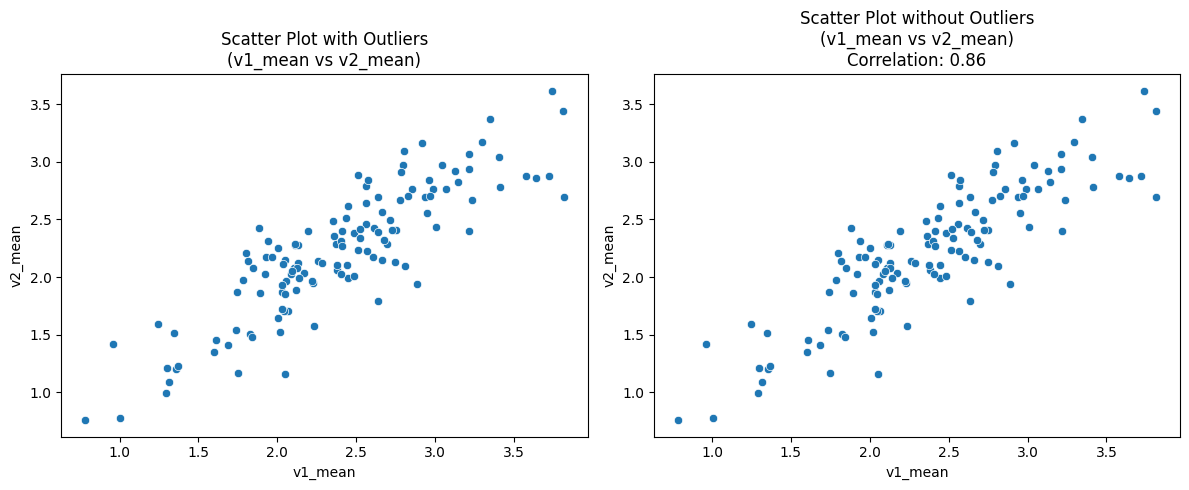

0.8626547420515727

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers for the first pair
data_no_outliers = data_subset[~outliers]

# Calculate correlation for the first pair without outliers
correlation = data_no_outliers.corr().iloc[0, 1]

# Plotting to show the process
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot with outliers
sns.scatterplot(data=data_subset, x=params[0], y=params[1], ax=ax[0])
ax[0].set_title(f'Scatter Plot with Outliers\n({params[0]} vs {params[1]})')

# Scatter plot without outliers
sns.scatterplot(data=data_no_outliers, x=params[0], y=params[1], ax=ax[1])
ax[1].set_title(f'Scatter Plot without Outliers\n({params[0]} vs {params[1]})\nCorrelation: {correlation:.2f}')

plt.tight_layout()
plt.show()

correlation


In [7]:
from itertools import combinations

# List of all selected parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Preparing a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)

# Calculate Mahalanobis distance and correlations for each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation  # Mirror the matrix

# Fill diagonal with NaN as we will put histograms there
np.fill_diagonal(correlation_matrix.values, np.nan)

correlation_matrix.head()  # Displaying the first few rows for review


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v1_mean   v2_mean   v3_mean   v4_mean    a_mean ndt1_mean ndt2_mean  \
v1_mean       NaN  0.862655 -0.758068 -0.761106  0.264298  0.216144   0.20657   
v2_mean  0.862655       NaN  -0.77432 -0.760505    0.4076  0.134816  0.302091   
v3_mean -0.758068  -0.77432       NaN  0.839348 -0.348158 -0.172399 -0.328288   
v4_mean -0.761106 -0.760505  0.839348       NaN -0.413732 -0.179103 -0.325484   
a_mean   0.264298    0.4076 -0.348158 -0.413732       NaN  0.347347  0.396431   

        ndt3_mean ndt4_mean alpha_mean accuracy_percentage mean_log_rt  \
v1_mean  0.157819  0.157207   0.507591            0.691509   -0.139653   
v2_mean  0.202705  0.177644   0.565446            0.780028   -0.021637   
v3_mean -0.288651 -0.175635  -0.535041           -0.733652    0.042819   
v4_mean -0.230818 -0.275174  -0.565115           -0.774146   -0.009014   
a_mean   0.420645  0.437985   0.714683            0.718922    0.802099   

        alpha_mean_boxcox_after_arcsin accuracy_percentage_boxcox_after_arcsin  
v1_mean                        0.44851                                0.699299  
v2_mean                       0.523418                                0.779545  
v3_mean                      -0.495546                               -0.742643  
v4_mean                      -0.516402                               -0.774924  
a_mean                        0.712451                                0.791975

In [8]:
correlation_matrix

v1_mean   v2_mean   v3_mean  \
v1_mean                                       NaN  0.862655 -0.758068   
v2_mean                                  0.862655       NaN  -0.77432   
v3_mean                                 -0.758068  -0.77432       NaN   
v4_mean                                 -0.761106 -0.760505  0.839348   
a_mean                                   0.264298    0.4076 -0.348158   
ndt1_mean                                0.216144  0.134816 -0.172399   
ndt2_mean                                 0.20657  0.302091 -0.328288   
ndt3_mean                                0.157819  0.202705 -0.288651   
ndt4_mean                                0.157207  0.177644 -0.175635   
alpha_mean                               0.507591  0.565446 -0.535041   
accuracy_percentage                      0.691509  0.780028 -0.733652   
mean_log_rt                             -0.139653 -0.021637  0.042819   
alpha_mean_boxcox_after_arcsin            0.44851  0.523418 -0.495546   
accuracy_percentage_boxcox_after_arcsin  0.699299  0.779545 -0.742643   

                                          v4_mean    a_mean ndt1_mean  \
v1_mean                                 -0.761106  0.264298  0.216144   
v2_mean                                 -0.760505    0.4076  0.134816   
v3_mean                                  0.839348 -0.348158 -0.172399   
v4_mean                                       NaN -0.413732 -0.179103   
a_mean                                  -0.413732       NaN  0.347347   
ndt1_mean                               -0.179103  0.347347       NaN   
ndt2_mean                               -0.325484  0.396431  0.881468   
ndt3_mean                               -0.230818  0.420645  0.767257   
ndt4_mean                               -0.275174  0.437985  0.756037   
alpha_mean                              -0.565115  0.714683  0.270684   
accuracy_percentage                     -0.774146  0.718922  0.220165   
mean_log_rt                             -0.009014  0.802099  0.513226   
alpha_mean_boxcox_after_arcsin          -0.516402  0.712451  0.288246   
accuracy_percentage_boxcox_after_arcsin -0.774924  0.791975   0.30471   

                                        ndt2_mean ndt3_mean ndt4_mean  \
v1_mean                                   0.20657  0.157819  0.157207   
v2_mean                                  0.302091  0.202705  0.177644   
v3_mean                                 -0.328288 -0.288651 -0.175635   
v4_mean                                 -0.325484 -0.230818 -0.275174   
a_mean                                   0.396431  0.420645  0.437985   
ndt1_mean                                0.881468  0.767257  0.756037   
ndt2_mean                                     NaN  0.765358  0.761991   
ndt3_mean                                0.765358       NaN  0.911774   
ndt4_mean                                0.761991  0.911774       NaN   
alpha_mean                               0.403461  0.371872  0.414945   
accuracy_percentage                      0.361646  0.290945  0.331934   
mean_log_rt                              0.624699  0.654739  0.674033   
alpha_mean_boxcox_after_arcsin           0.357727  0.317935  0.357433   
accuracy_percentage_boxcox_after_arcsin  0.419477  0.350324  0.350466   

                                        alpha_mean accuracy_percentage  \
v1_mean                                   0.507591            0.691509   
v2_mean                                   0.565446            0.780028   
v3_mean                                  -0.535041           -0.733652   
v4_mean                                  -0.565115           -0.774146   
a_mean                                    0.714683            0.718922   
ndt1_mean                                 0.270684            0.220165   
ndt2_mean                                 0.403461            0.361646   
ndt3_mean                                 0.371872            0.290945   
ndt4_mean                                 0.414945            0.331934   
alpha_mean    

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

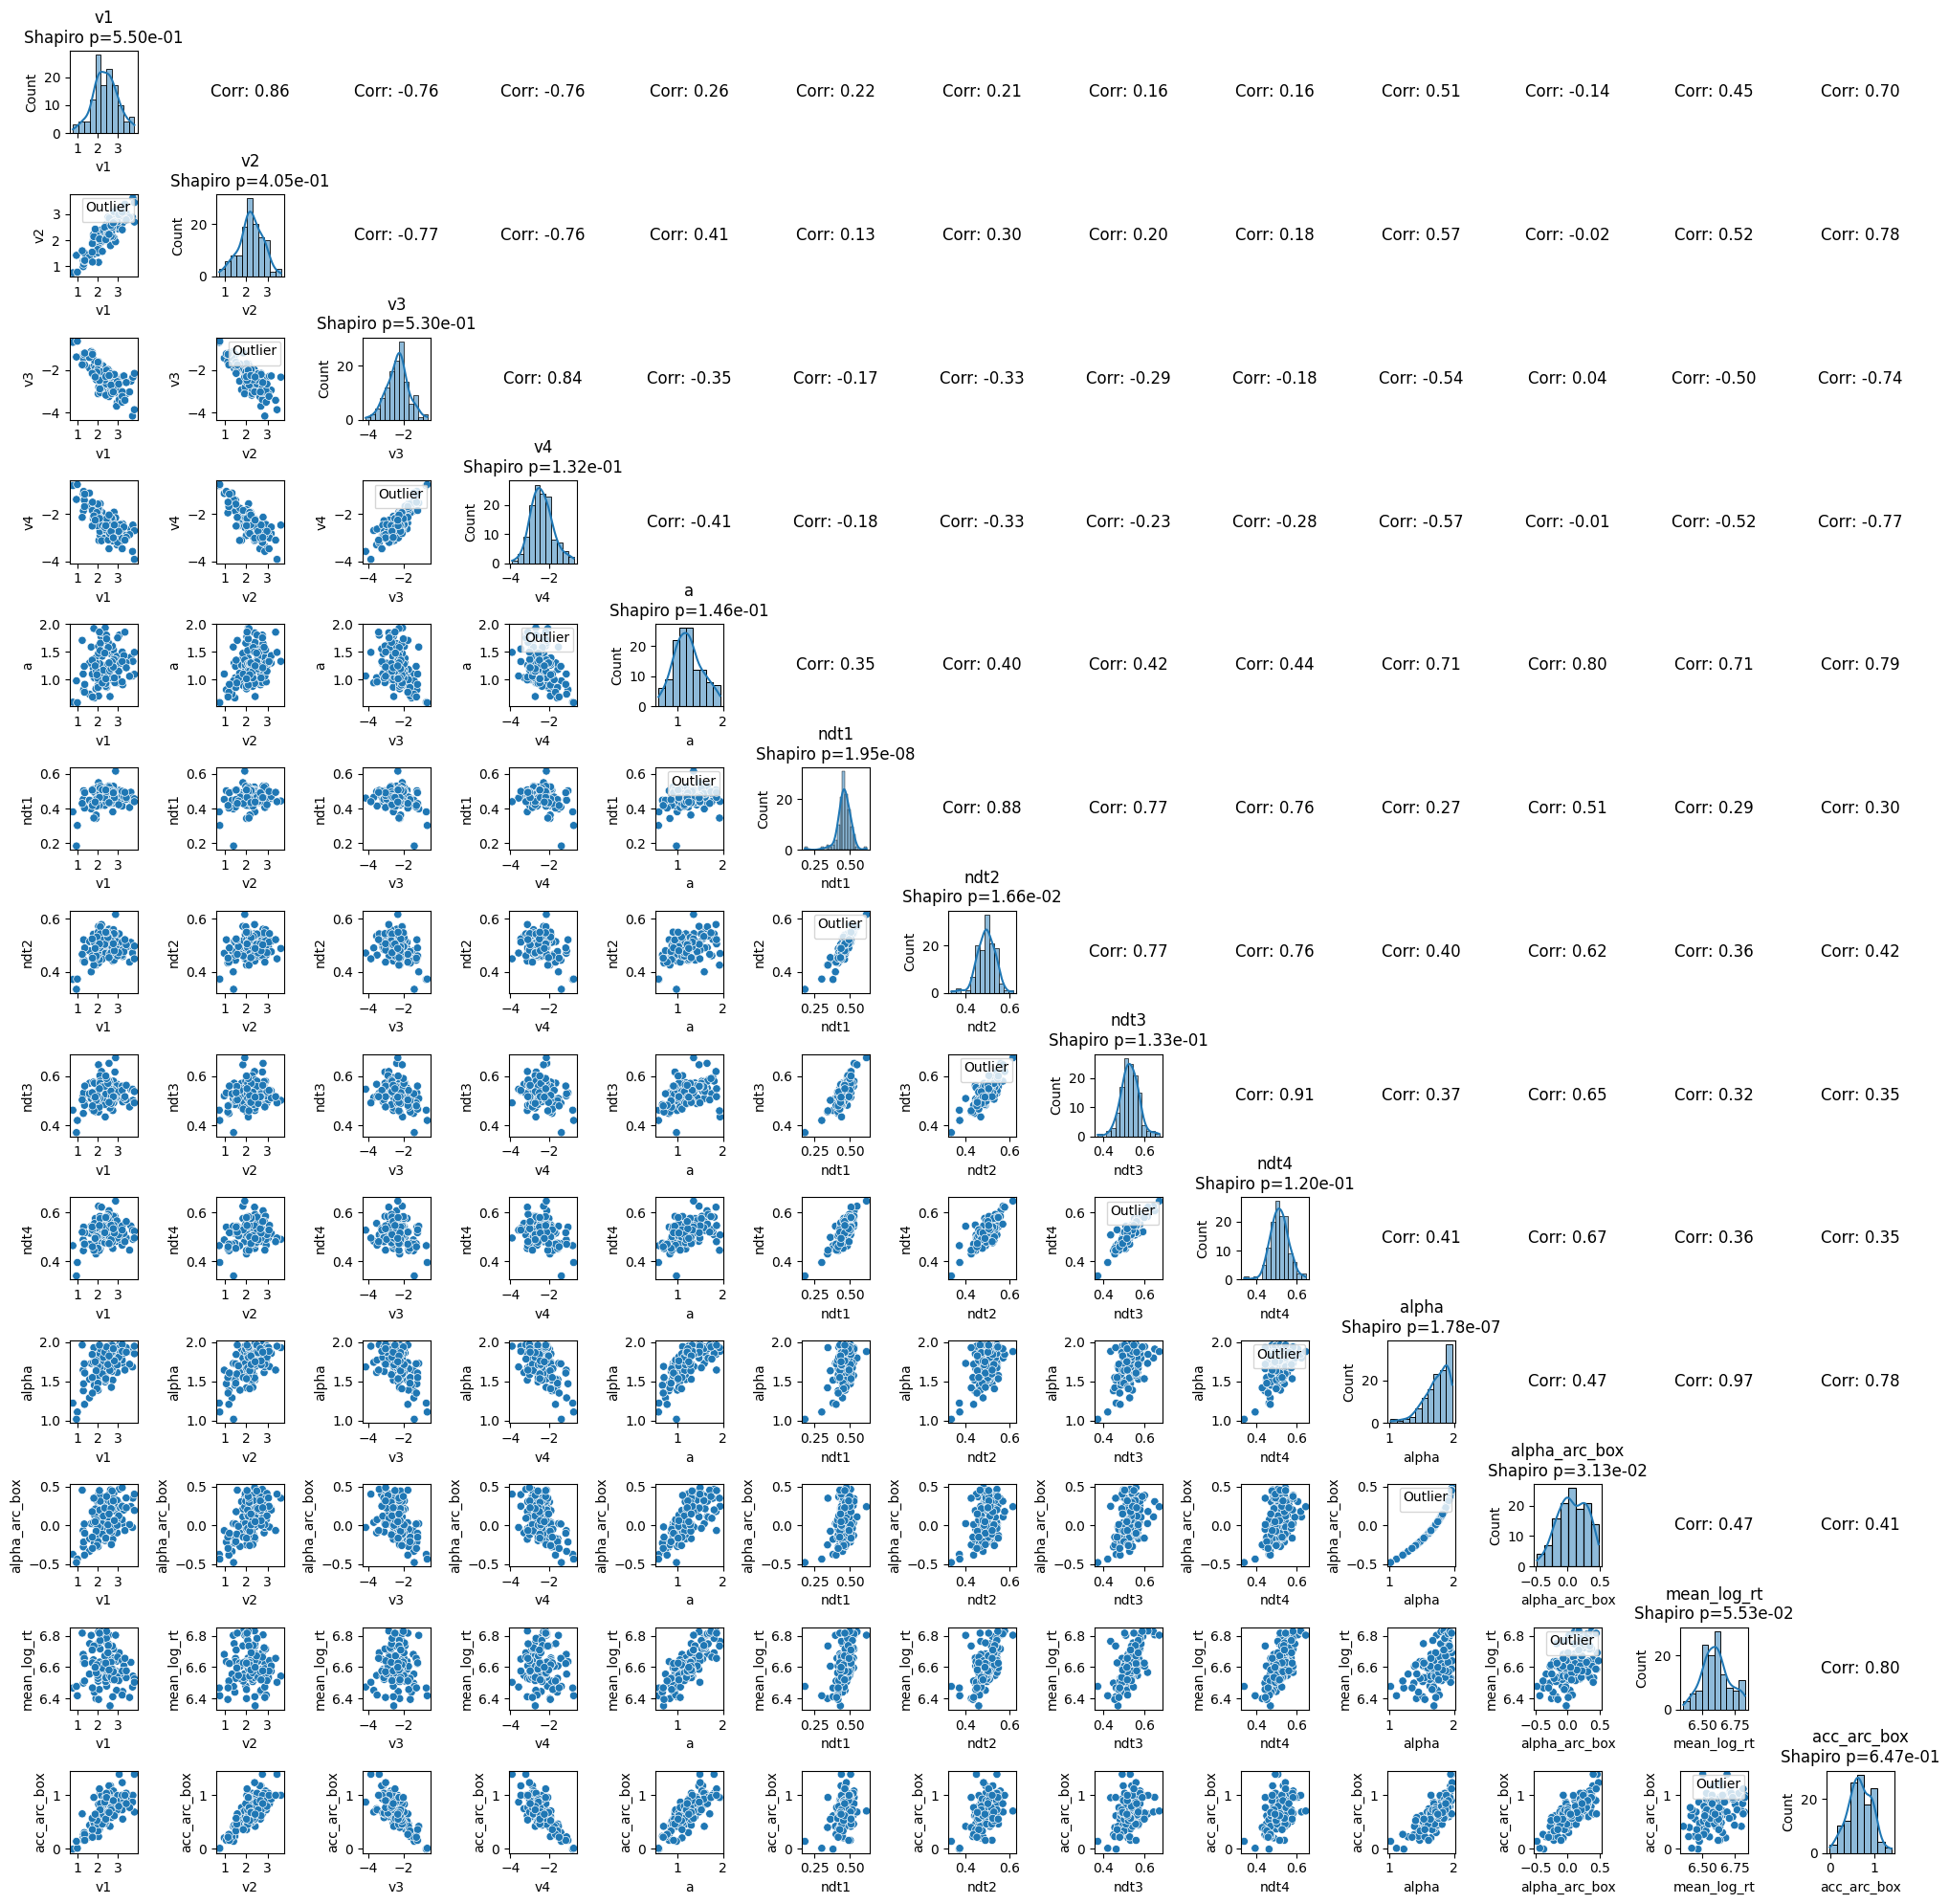

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_2.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
     'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
          #  plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.savefig('EZ_APT_S2_correlation_matrix_plot.png')  # Saves the plot to a file
plt.show()
plt.close()



In [10]:
correlation_matrix_renamed.to_csv('EZ_Distinct_APT_s2_correlation_matrix.csv')

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

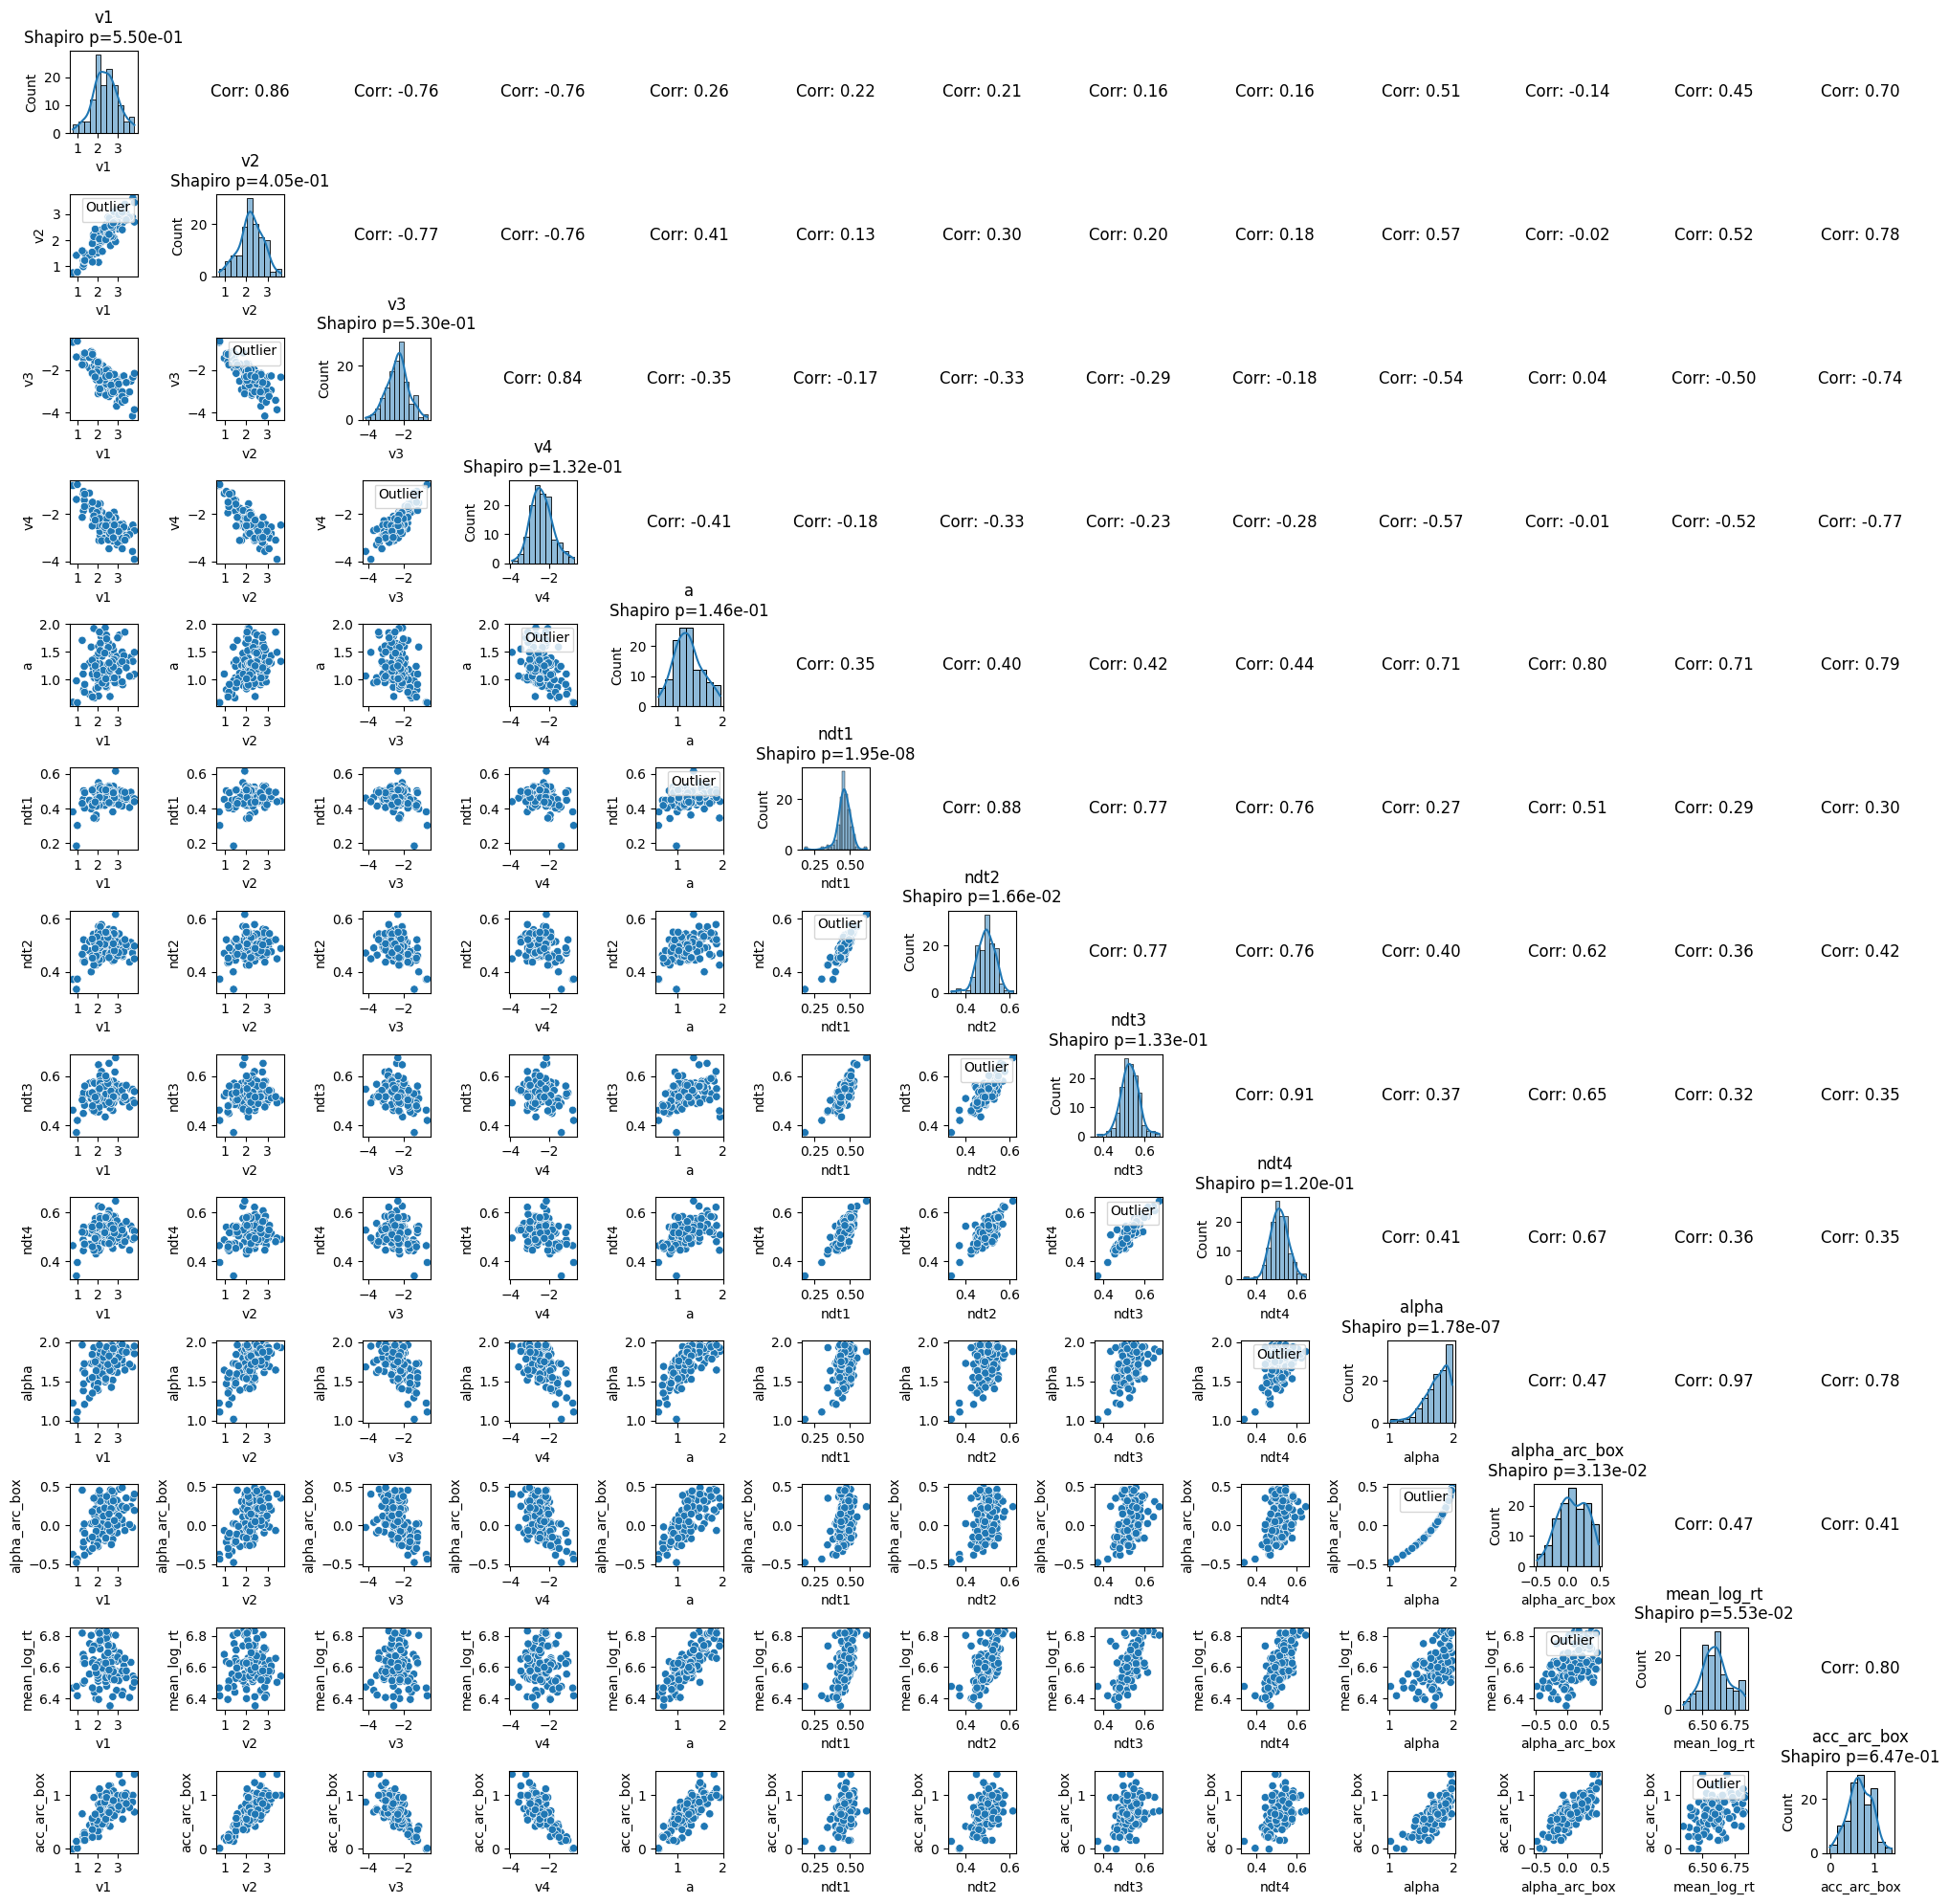

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_2.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    #'zr_mean': 'zr'
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 
    'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('EZ_APT_S2_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [13]:
correlation_matrix_renamed

v1        v2        v3        v4         a      ndt1  \
v1                  NaN  0.862655 -0.758068 -0.761106  0.264298  0.216144   
v2             0.862655       NaN  -0.77432 -0.760505    0.4076  0.134816   
v3            -0.758068  -0.77432       NaN  0.839348 -0.348158 -0.172399   
v4            -0.761106 -0.760505  0.839348       NaN -0.413732 -0.179103   
a              0.264298    0.4076 -0.348158 -0.413732       NaN  0.347347   
ndt1           0.216144  0.134816 -0.172399 -0.179103  0.347347       NaN   
ndt2            0.20657  0.302091 -0.328288 -0.325484  0.396431  0.881468   
ndt3           0.157819  0.202705 -0.288651 -0.230818  0.420645  0.767257   
ndt4           0.157207  0.177644 -0.175635 -0.275174  0.437985  0.756037   
alpha          0.507591  0.565446 -0.535041 -0.565115  0.714683  0.270684   
mean_log_rt   -0.139653 -0.021637  0.042819 -0.009014  0.802099  0.513226   
alpha_arc_box   0.44851  0.523418 -0.495546 -0.516402  0.712451  0.288246   
acc_arc_box    0.699299  0.779545 -0.742643 -0.774924  0.791975   0.30471   

                   ndt2      ndt3      ndt4     alpha mean_log_rt  \
v1              0.20657  0.157819  0.157207  0.507591   -0.139653   
v2             0.302091  0.202705  0.177644  0.565446   -0.021637   
v3            -0.328288 -0.288651 -0.175635 -0.535041    0.042819   
v4            -0.325484 -0.230818 -0.275174 -0.565115   -0.009014   
a              0.396431  0.420645  0.437985  0.714683    0.802099   
ndt1           0.881468  0.767257  0.756037  0.270684    0.513226   
ndt2                NaN  0.765358  0.761991  0.403461    0.624699   
ndt3           0.765358       NaN  0.911774  0.371872    0.654739   
ndt4           0.761991  0.911774       NaN  0.414945    0.674033   
alpha          0.403461  0.371872  0.414945       NaN    0.469009   
mean_log_rt    0.624699  0.654739  0.674033  0.469009         NaN   
alpha_arc_box  0.357727  0.317935  0.357433  0.973543    0.472166   
acc_arc_box    0.419477  0.350324  0.350466  0.778871    0.407816   

              alpha_arc_box acc_arc_box  
v1                  0.44851    0.699299  
v2                 0.523418    0.779545  
v3                -0.495546   -0.742643  
v4                -0.516402   -0.774924  
a                  0.712451    0.791975  
ndt1               0.288246     0.30471  
ndt2               0.357727    0.419477  
ndt3               0.317935    0.350324  
ndt4               0.357433    0.350466  
alpha              0.973543    0.778871  
mean_log_rt        0.472166    0.407816  
alpha_arc_box           NaN    0.800322  
acc_arc_box        0.800322         NaN

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

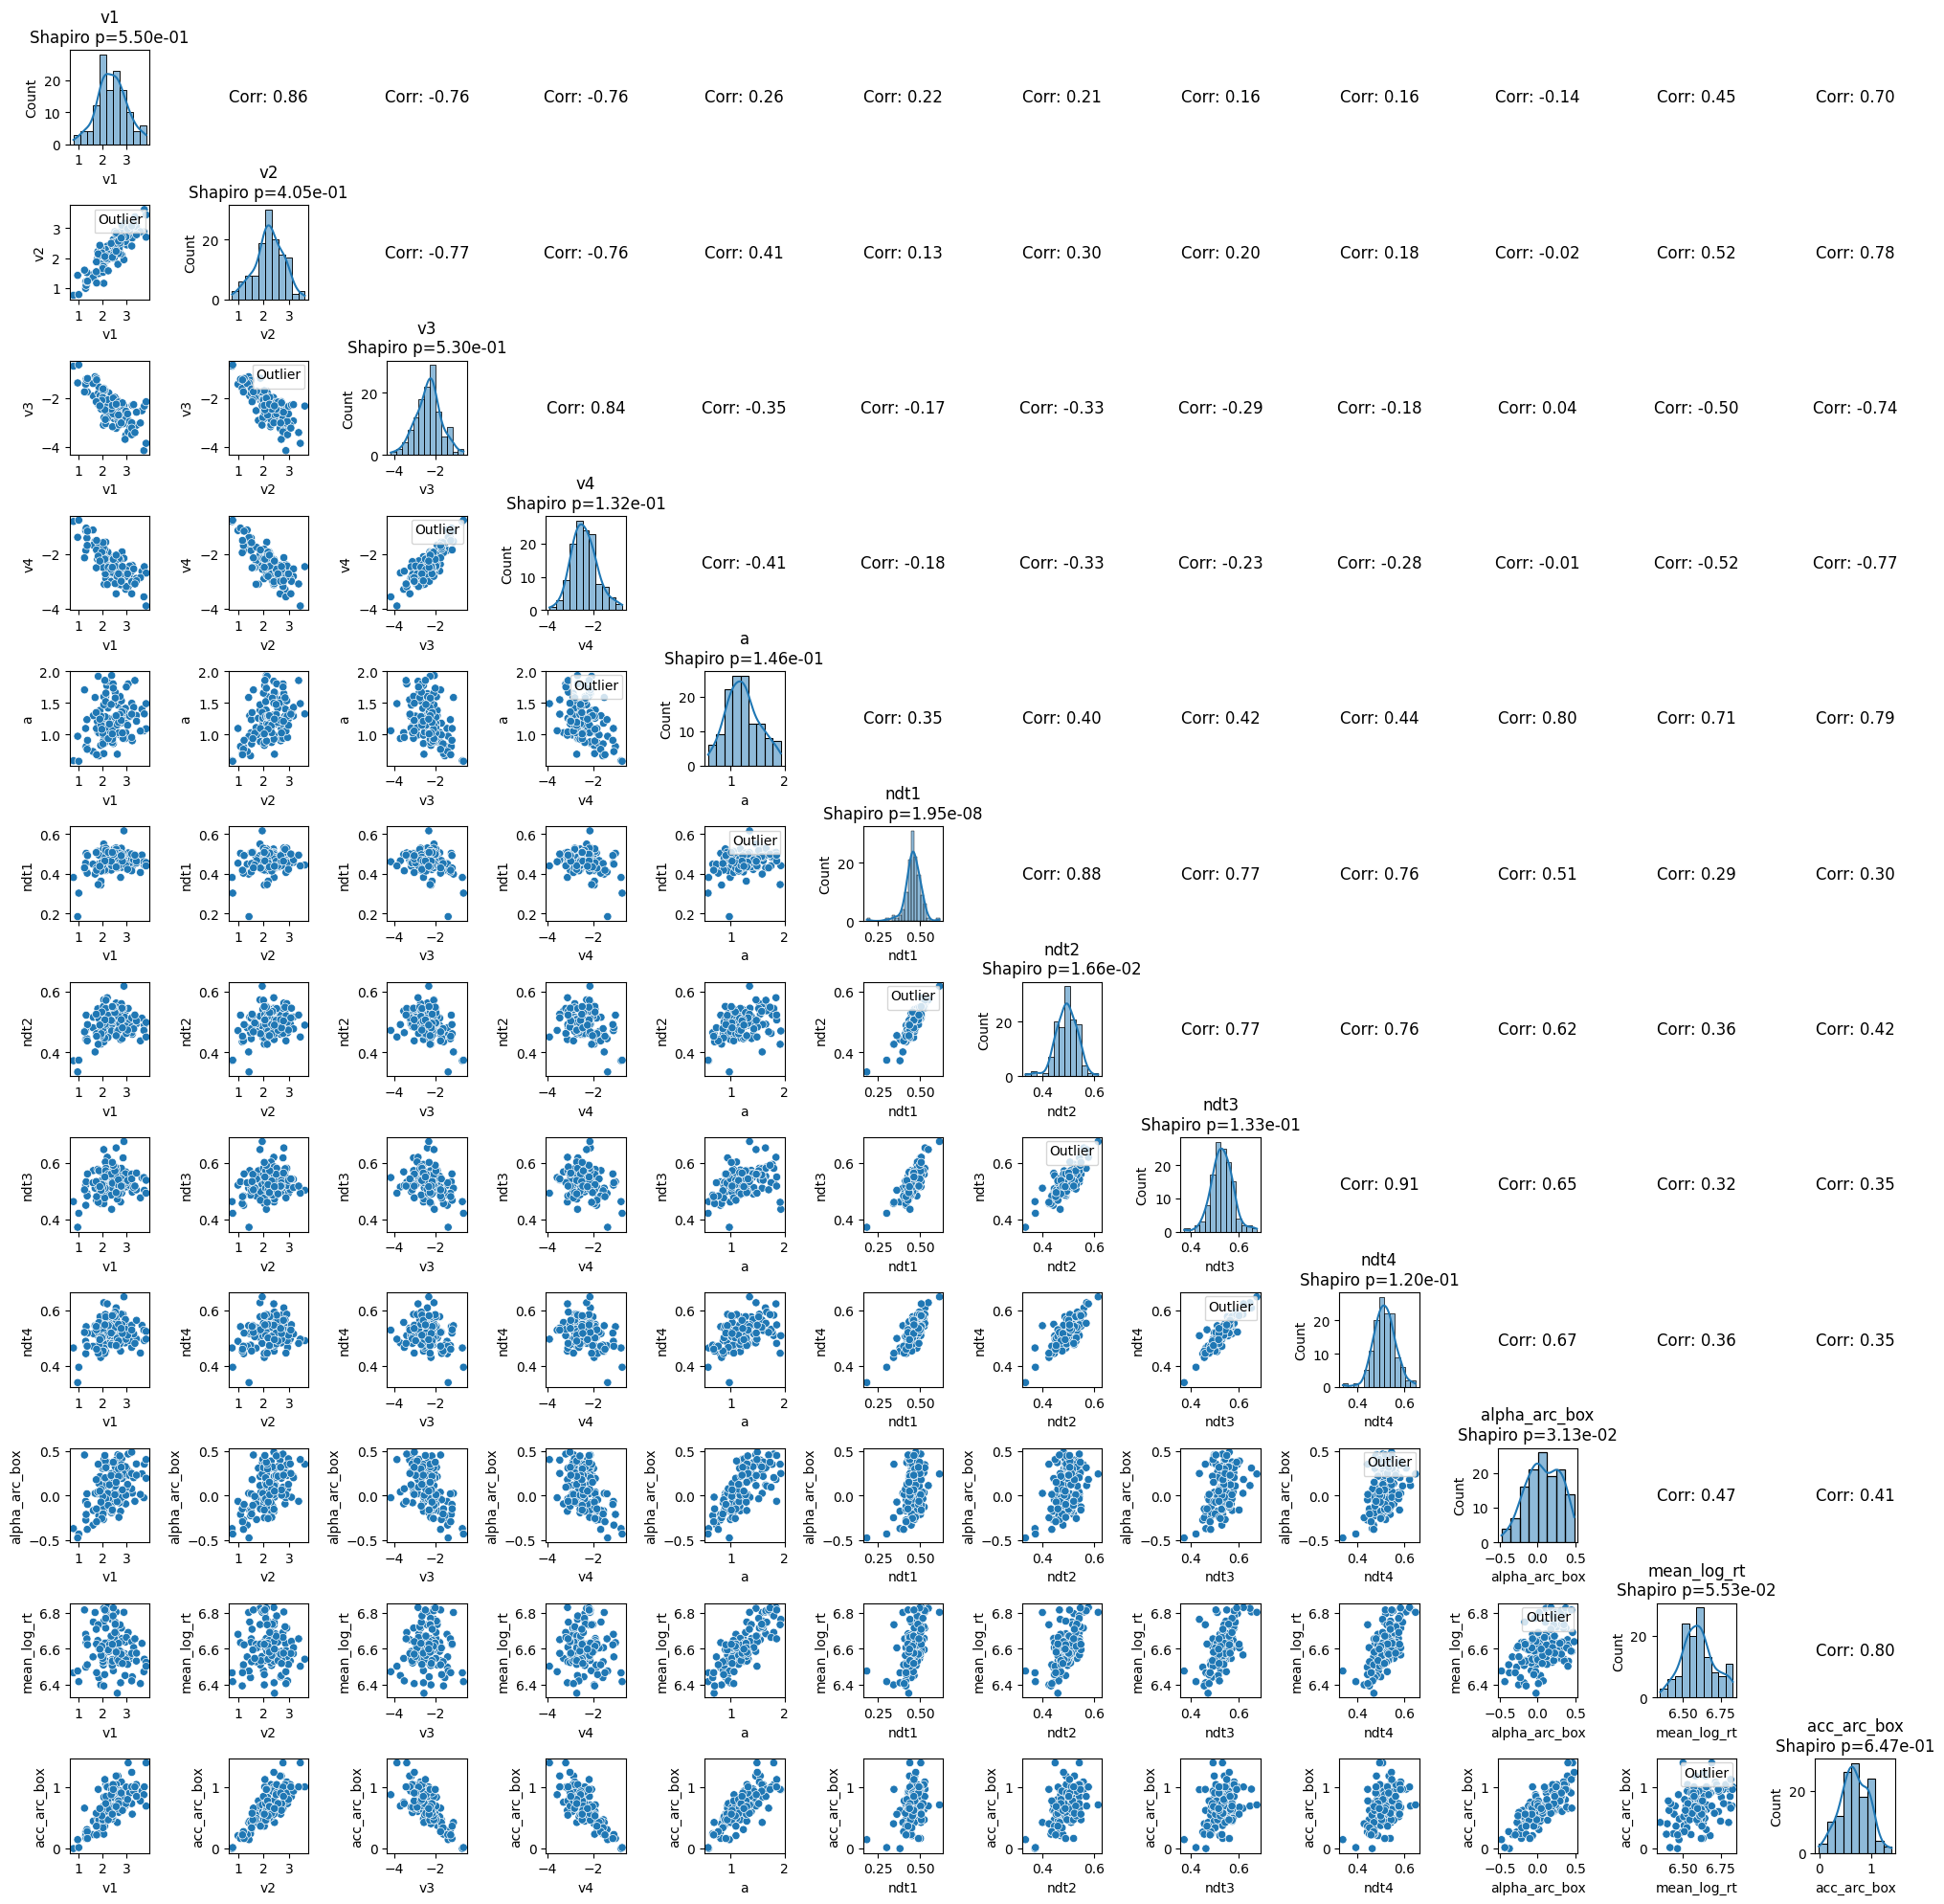

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_2.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
# 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
# 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
   # 'zr_mean': 'zr', 
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('EZ_APT_S2_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [16]:
correlation_matrix_renamed

v1        v2        v3        v4         a      ndt1  \
v1                  NaN  0.862655 -0.758068 -0.761106  0.264298  0.216144   
v2             0.862655       NaN  -0.77432 -0.760505    0.4076  0.134816   
v3            -0.758068  -0.77432       NaN  0.839348 -0.348158 -0.172399   
v4            -0.761106 -0.760505  0.839348       NaN -0.413732 -0.179103   
a              0.264298    0.4076 -0.348158 -0.413732       NaN  0.347347   
ndt1           0.216144  0.134816 -0.172399 -0.179103  0.347347       NaN   
ndt2            0.20657  0.302091 -0.328288 -0.325484  0.396431  0.881468   
ndt3           0.157819  0.202705 -0.288651 -0.230818  0.420645  0.767257   
ndt4           0.157207  0.177644 -0.175635 -0.275174  0.437985  0.756037   
mean_log_rt   -0.139653 -0.021637  0.042819 -0.009014  0.802099  0.513226   
alpha_arc_box   0.44851  0.523418 -0.495546 -0.516402  0.712451  0.288246   
acc_arc_box    0.699299  0.779545 -0.742643 -0.774924  0.791975   0.30471   

                   ndt2      ndt3      ndt4 mean_log_rt alpha_arc_box  \
v1              0.20657  0.157819  0.157207   -0.139653       0.44851   
v2             0.302091  0.202705  0.177644   -0.021637      0.523418   
v3            -0.328288 -0.288651 -0.175635    0.042819     -0.495546   
v4            -0.325484 -0.230818 -0.275174   -0.009014     -0.516402   
a              0.396431  0.420645  0.437985    0.802099      0.712451   
ndt1           0.881468  0.767257  0.756037    0.513226      0.288246   
ndt2                NaN  0.765358  0.761991    0.624699      0.357727   
ndt3           0.765358       NaN  0.911774    0.654739      0.317935   
ndt4           0.761991  0.911774       NaN    0.674033      0.357433   
mean_log_rt    0.624699  0.654739  0.674033         NaN      0.472166   
alpha_arc_box  0.357727  0.317935  0.357433    0.472166           NaN   
acc_arc_box    0.419477  0.350324  0.350466    0.407816      0.800322   

              acc_arc_box  
v1               0.699299  
v2               0.779545  
v3              -0.742643  
v4              -0.774924  
a                0.791975  
ndt1              0.30471  
ndt2             0.419477  
ndt3             0.350324  
ndt4             0.350466  
mean_log_rt      0.407816  
alpha_arc_box    0.800322  
acc_arc_box           NaN